In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/My Drive/Xai/diabeties


/content/drive/My Drive/Xai/diabeties


In [1]:
import pandas as pd             # data mnipulation
import numpy as np              # number manipulation/crunching
import matplotlib.pyplot as plt # plotting
# Classification report
from sklearn.metrics import classification_report 
# Train Test split
from sklearn.model_selection import train_test_split
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns 
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from xgboost import XGBClassifier, plot_importance
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
diabetes = pd.read_csv("diabetes_csv.csv")
diabetes.head()

preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [3]:
diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [4]:
y = diabetes['class']
X = diabetes[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']]
X_featurenames = X.columns
# Split the data into train and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [5]:
X.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [6]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

### AIX360

In [7]:
# pip install aix360

In [8]:
X_train.head()

preg  plas  pres  skin  insu  mass   pedi  age
34     10   122    78    31     0  27.6  0.512   45
221     2   158    90     0     0  31.6  0.805   66
531     0   107    76     0     0  45.3  0.686   24
518    13    76    60     0     0  32.8  0.180   41
650     1    91    54    25   100  25.2  0.234   23

In [11]:
pip install aix360

     |████████████████████████████████| 58.3MB 74kB/s 
     |████████████████████████████████| 109.2MB 51kB/s 
     |████████████████████████████████| 276kB 42.8MB/s 
     |████████████████████████████████| 109.8MB 50kB/s 
     |████████████████████████████████| 378kB 44.9MB/s 
     |████████████████████████████████| 266kB 44.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 3.2MB 20.4MB/s 
     |████████████████████████████████| 491kB 55.2MB/s 
     |████████████████████████████████| 276kB 52.6MB/s 
  Created wheel for lime: filename=lime-0.1.1.37-cp36-none-any.whl size=284277 sha256=c9c50a6bc14a122a52c10d74ad293931e6d2e06df8db23e96e8e8e09eda3b739
  Stored in directory: /root/.cache/pip/wheels/c1/38/e7/50d75d4fb75afa604570dc42f20c5c5f5ab26d3fbe8d6ef27b
  Created wheel for qpsolvers: filename=qpsolvers-1.5-cp36-none-any.whl size=18785 sha256=afd59905230c37412d761226ef559f2e0b4515bd1002ff4793429a48eda0891b
  Stored in directory: /root/.

In [12]:
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True)
X_train_fb = fb.fit_transform(X_train)
X_test_fb = fb.transform(X_test)

In [32]:
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True, returnOrd=True)
dfTrain, dfTrainStd = fb.fit_transform(X_train)
dfTest, dfTestStd = fb.transform(X_test)
dfTrain.head()

feature   preg            ...  age          
operation   <=            ...    >          
value     0.0  1.0  2.0   ... 39.0 43.0 52.0
34           0    0    0  ...    1    1    0
221          0    0    1  ...    1    1    1
531          1    1    1  ...    0    0    0
518          0    0    0  ...    1    0    0
650          0    1    1  ...    0    0    0

[5 rows x 130 columns]

In [13]:
X_train_fb[:8]

feature   preg            ...  age          
operation   <=            ...    >          
value     0.0  1.0  2.0   ... 39.0 43.0 52.0
34           0    0    0  ...    1    1    0
221          0    0    1  ...    1    1    1
531          1    1    1  ...    0    0    0
518          0    0    0  ...    1    0    0
650          0    1    1  ...    0    0    0
250          0    0    0  ...    1    0    0
493          0    0    0  ...    1    1    0
179          0    0    0  ...    0    0    0

[8 rows x 130 columns]

In [14]:
from aix360.algorithms.rbm import BRCGExplainer, BooleanRuleCG

In [15]:
boolean_model = BooleanRuleCG(silent=True)
explainer = BRCGExplainer(boolean_model)
explainer.fit(X_train_fb, y_train)

In [16]:
Y_pred = explainer.predict(X_test_fb)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy = {accuracy_score(y_test, Y_pred)}')
print(f'Precision = {precision_score(y_test, Y_pred)}')
print(f'Recall = {recall_score(y_test, Y_pred)}')
print(f'F1 = {f1_score(y_test, Y_pred)}')

Accuracy = 0.8008658008658008
Precision = 0.8181818181818182
Recall = 0.5555555555555556
F1 = 0.661764705882353


In [18]:
e = explainer.explain()
isCNF = 'Predict Y=0 if ANY of the following rules are satisfied, otherwise Y=1:'
notCNF = 'Predict Y=1 if ANY of the following rules are satisfied, otherwise Y=0:'
print(isCNF if e['isCNF'] else notCNF)
print()
for rule in e['rules']:
    print(f'  - {rule}')

Predict Y=1 if ANY of the following rules are satisfied, otherwise Y=0:

  - plas > 165.40 AND insu > 96.00
  - plas > 145.80 AND insu <= 62.20 AND mass > 30.04
  - plas > 124.00 AND pres <= 54.00 AND age <= 52.00 AND age > 24.00
  - pres > 78.00 AND skin > 17.00 AND insu > 143.20 AND age > 27.00
  - plas > 145.80 AND mass <= 25.92 AND mass > 23.96 AND age > 24.00
  - preg > 6.00 AND plas > 95.00 AND mass > 25.92 AND pedi > 0.46 AND age <= 52.00
  - plas <= 165.40 AND plas > 109.00 AND pres <= 78.00 AND pres > 54.00 AND skin <= 40.00 AND insu <= 143.20 AND mass <= 41.30 AND mass > 28.20 AND age > 39.00


In [19]:
e

{'isCNF': False,
 'rules': ['plas > 165.40 AND insu > 96.00',
  'plas > 145.80 AND insu <= 62.20 AND mass > 30.04',
  'plas > 124.00 AND pres <= 54.00 AND age <= 52.00 AND age > 24.00',
  'pres > 78.00 AND skin > 17.00 AND insu > 143.20 AND age > 27.00',
  'plas > 145.80 AND mass <= 25.92 AND mass > 23.96 AND age > 24.00',
  'preg > 6.00 AND plas > 95.00 AND mass > 25.92 AND pedi > 0.46 AND age <= 52.00',
  'plas <= 165.40 AND plas > 109.00 AND pres <= 78.00 AND pres > 54.00 AND skin <= 40.00 AND insu <= 143.20 AND mass <= 41.30 AND mass > 28.20 AND age > 39.00']}

In [33]:
# Instantiate LRR with good complexity penalties and numerical features
from aix360.algorithms.rbm import LogisticRuleRegression
lrr = LogisticRuleRegression()
lrr.fit(dfTrain, y_train,dfTrainStd)


In [36]:
Y_pred = lrr.predict(X_test_fb)

In [37]:
print(f'Accuracy = {accuracy_score(y_test, Y_pred)}')
print(f'Precision = {precision_score(y_test, Y_pred)}')
print(f'Recall = {recall_score(y_test, Y_pred)}')
print(f'F1 = {f1_score(y_test, Y_pred)}')

Accuracy = 0.7575757575757576
Precision = 0.6623376623376623
Recall = 0.6296296296296297
F1 = 0.6455696202531646


In [38]:

lrr.explain()

rule coefficient
0                      (intercept)   -0.760092
1  plas <= 145.80 AND age <= 30.00    -2.15115
2   plas > 102.00 AND mass > 28.20     1.64967
3                   plas <= 124.00   -0.781315
4    plas > 102.00 AND age > 24.00    0.657682
5                    plas > 124.00    0.147905

In [30]:
dfx = lrr.explain()
# Separate 1st-degree rules into (feature, operation, value) to count unique features
dfx2 = dfx['rule'].str.split(' ', expand=True)
dfx2.columns = ['feature','operation','value']
dfx2['feature'].nunique() # includes intercept

ValueError: ignored

In [42]:
Z = np.vstack((X_train, X_test))
Zmax = np.max(Z, axis=0)
Zmin = np.min(Z, axis=0)

#normalize an array of samples to range [-0.5, 0.5]
def normalize(V):
    VN = (V - Zmin)/(Zmax - Zmin)
    VN = VN - 0.5
    return(VN)
    
# rescale a sample to recover original values for normalized values. 
def rescale(X):
    return(np.multiply ( X + 0.5, (Zmax - Zmin) ) + Zmin)

N = normalize(Z)
xn_train = N[0:X_train.shape[0], :]
xn_test  = N[X_train.shape[0]:, :]

In [43]:

# nn with no softmax
def nn_small():
    model = Sequential()
    model.add(Dense(10, input_dim=23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal'))    
    return model

In [45]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Dense
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

Using TensorFlow backend.


In [ ]:
# xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
# xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# xgb_predictions = xgb.predict(X_test)

In [ ]:
# def evaluation_scores(test, prediction, target_names=None):
#     print('Accuracy:', np.round(metrics.accuracy_score(test, prediction), 4)) 
#     print('-'*60)
#     print('classification report:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
#     classes = [0, 1]
#     total_classes = len(classes)
#     print(total_classes)
#     level_labels = [total_classes*[0], list(range(total_classes))]
#     print(level_labels)

#     cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
  
#     print('-'*60)
#     print('Confusion matrix:\n')
#     print(cm)

In [ ]:
# evaluation_scores(y_test, xgb_predictions, target_names=['Diabetes -ve', 'Diabetes +ve'])

In [ ]:
# Build the model with the random forest regression algorithm:
model = RandomForestClassifier(max_depth = 20, random_state = 0, n_estimators = 10000)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4)) 
print('-'*60)
print(classification_report(y_test, y_pred, target_names=["Diabetes -ve", "Diabetes +ve"]))

Accuracy: 0.8052
------------------------------------------------------------
              precision    recall  f1-score   support

Diabetes -ve       0.83      0.88      0.85       150
Diabetes +ve       0.75      0.67      0.71        81

    accuracy                           0.81       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.80      0.81      0.80       231



###  SHAP explainers via aix360

In [ ]:
# Importing shap KernelExplainer (aix360 style)
from aix360.algorithms.shap import KernelExplainer

# the following import is required for access to shap plotting functions and datasets
import shap

In [ ]:
shapexplainer = KernelExplainer(model.predict_proba, X_train)
print(type(shapexplainer))

Using 537 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


<class 'aix360.algorithms.shap.shap_wrapper.KernelExplainer'>


In [ ]:
# aix360 style for explaining input instances
shap_values = shapexplainer.explain_instance(X_test.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(shapexplainer.explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

In [ ]:
# Importing shap KernelExplainer (original style)
import shap
from shap import KernelExplainer

In [ ]:
explainer = KernelExplainer(model.predict_proba, X_train)
print(type(explainer))

Using 537 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


<class 'shap.explainers.kernel.KernelExplainer'>


In [ ]:
# Shap original style for explaining input instances
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

**LIME**

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 4.3MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=2a3435f74200bcd7585152a9f0e4d306e6ec8b904ea3dac94139806ef6465210
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names = X_featurenames, class_names = ['Diabetes -ve', 'Diabetes +ve'], feature_selection = "lasso_path", discretize_continuous = True, discretizer = "quartile", verbose = True, mode = 'classification')

explainer takes a training dataset as an array, the names of the features used in the model and the names of the classes in the target variable.



In [ ]:
X_test.iloc[0:20]

preg  plas  pres  skin  insu  mass   pedi  age
608     0   152    82    39   272  41.5  0.270   27
626     0   125    68     0     0  24.7  0.206   21
678     3   121    52     0     0  36.0  0.127   25
186     8   181    68    36   495  30.1  0.615   60
520     2    68    70    32    66  25.0  0.187   25
81      2    74     0     0     0   0.0  0.102   22
592     3   132    80     0     0  34.4  0.402   44
507     1   130    60    23   170  28.6  0.692   21
680     2    56    56    28    45  24.2  0.332   22
94      2   142    82    18    64  24.7  0.761   21
333    12   106    80     0     0  23.6  0.137   44
765     5   121    72    23   112  26.2  0.245   30
595     0   188    82    14   185  32.0  0.682   22
431     3    89    74    16    85  30.4  0.551   38
319     6   194    78     0     0  23.5  0.129   59
295     6   151    62    31   120  35.5  0.692   28
525     3    87    60    18     0  21.8  0.444   21
633     1   128    82    17   183  27.5  0.115   22
339     7   178    84     0     0  39.9  0.331   41
54      7   150    66    42   342  34.7  0.718   42

In [ ]:
y_test.iloc[0:20]

608    0
626    0
678    1
186    1
520    0
81     0
592    1
507    0
680    0
94     0
333    0
765    0
595    1
431    0
319    1
295    0
525    0
633    0
339    1
54     0
Name: class, dtype: int64

Intercept 0.2535593247531854
Prediction_local [0.71731981]
Right: 0.851051282051282


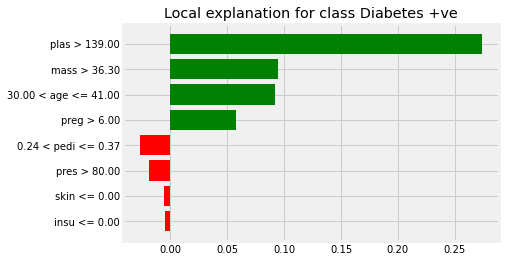

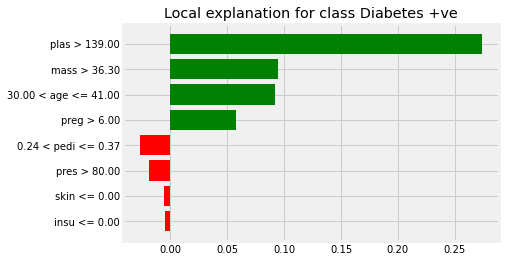

In [ ]:
exp = explainer.explain_instance(X_test.iloc[18], model.predict_proba)
exp.as_pyplot_figure() #339

In [ ]:
exp = explainer.explain_instance(X_test.iloc[6], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False) #592

Intercept 0.340037186217855
Prediction_local [0.48038061]
Right: 0.557121282051282


Intercept 0.3334025784958242
Prediction_local [0.50010798]
Right: 0.557121282051282


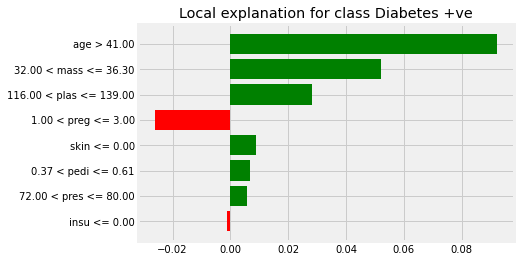

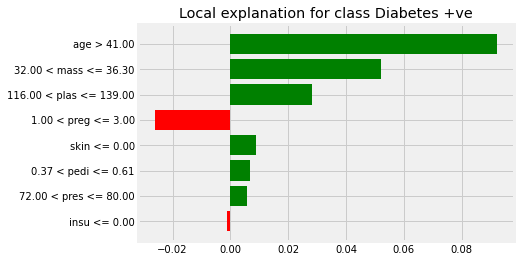

In [ ]:
exp = explainer.explain_instance(X_test.iloc[6], model.predict_proba)
exp.as_pyplot_figure()

In [ ]:
exp = explainer.explain_instance(X_test.iloc[6], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False) #592

Intercept 0.33836311211479575
Prediction_local [0.50046598]
Right: 0.557121282051282


Intercept 0.21841147236542863
Prediction_local [0.85816502]
Right: 0.755


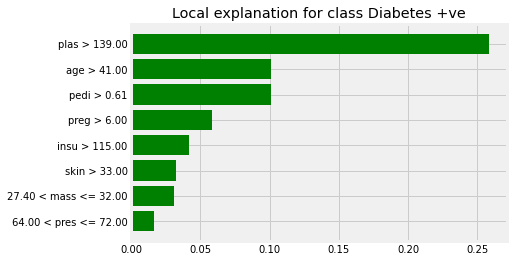

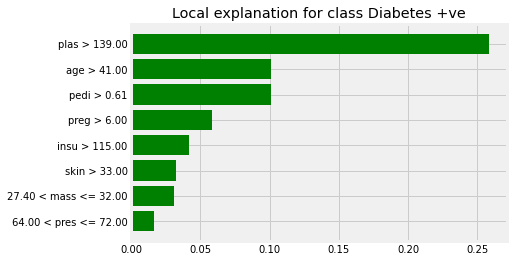

In [ ]:
exp = explainer.explain_instance(X_test.iloc[3], model.predict_proba)
exp.as_pyplot_figure()

In [ ]:
exp = explainer.explain_instance(X_test.iloc[3], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)

Intercept 0.21758658874841288
Prediction_local [0.84524498]
Right: 0.755


**ELI5**

In [ ]:
# !pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 112kB 8.5MB/s 


In [ ]:
eli5.show_weights(model, feature_names = X.columns.tolist())

In [ ]:
from eli5 import show_prediction
show_prediction(model, X_train.iloc[2], feature_names = X.columns.tolist(), 
                show_feature_values=True)

**PDP**

In [ ]:
!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

     |████████████████████████████████| 57.7MB 77kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690724 sha256=834fbbc1a66d3b3078e89a107079134470bcde31adbdadd93d83303a192e99a0
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [ ]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


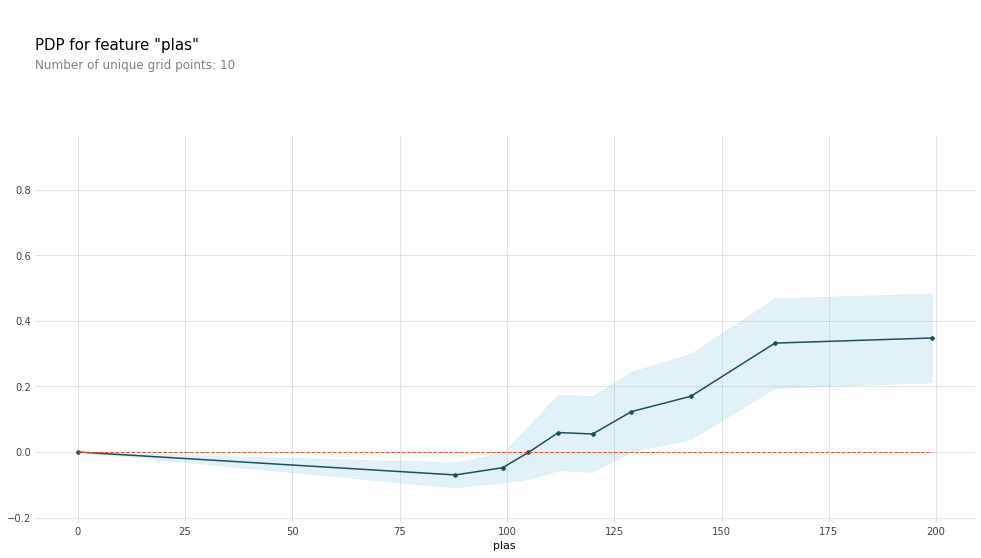

In [ ]:
plot_pdp(model, X_train, 'plas')

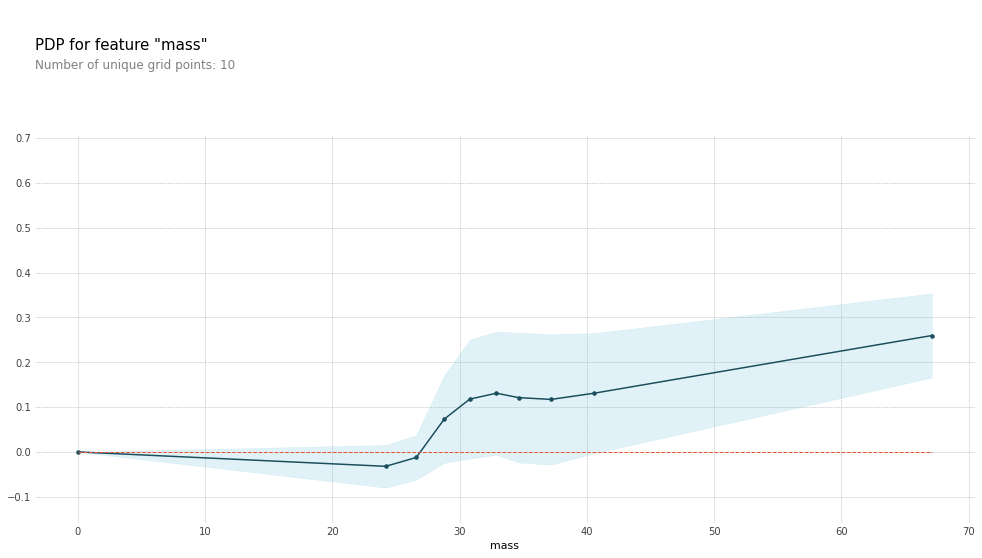

In [ ]:
plot_pdp(model, X_train, 'mass')

**ICE**

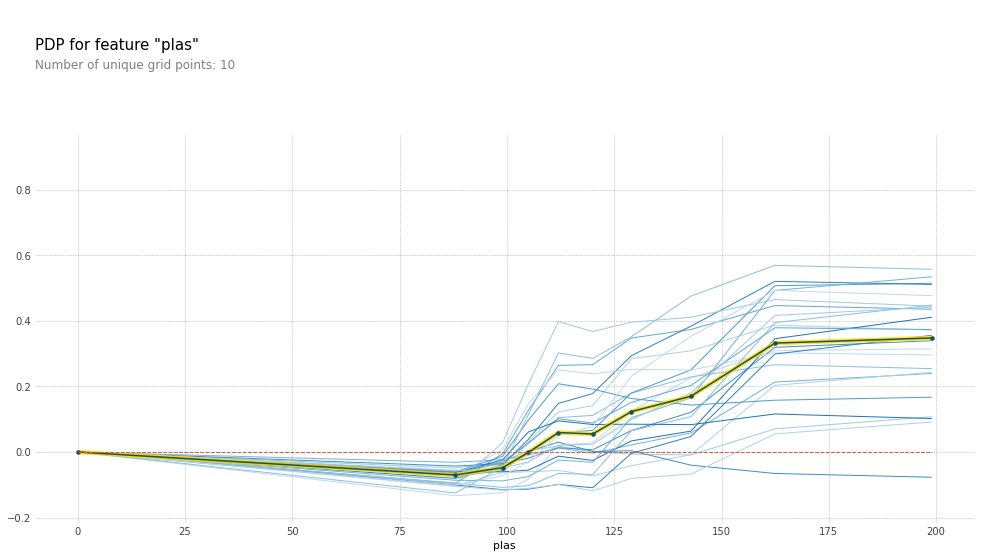

In [ ]:
plot_pdp(model, X_train, 'plas', cluster_flag=True, nb_clusters=24, lines_flag=True)

**SHAP**

In [ ]:
!pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()

     |████████████████████████████████| 327kB 4.3MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463905 sha256=a325d0369dc1cc9427b902d6f37b74037ab77579284ea09315b1d7bf9551ba1d
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
row_to_show = 10
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

model.predict_proba(data_for_prediction_array)

array([[0.8001, 0.1999]])

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

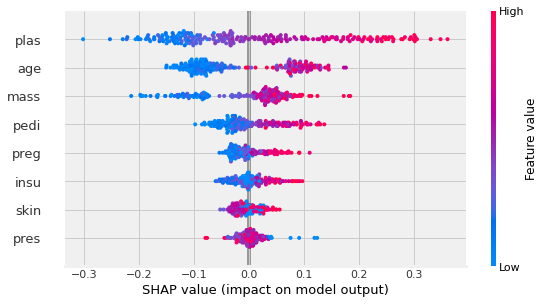

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1],X_test)

In [ ]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  [0.65158454 0.34841546]


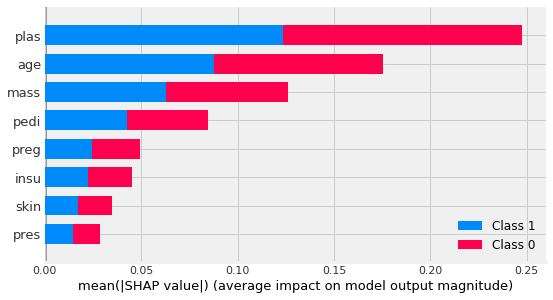

In [ ]:
shap.summary_plot(shap_values, X_test)